In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_dem = [19604096, 28746736, 21188722, 138947814, 62987338, 53340089]

In [3]:
def get_pop(state, df2, b):
    listo = list(state_series)
    for x in listo:
        df = df2[df2['state'] == state] 
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [4]:
data_state = pd.read_excel('data/state.xlsx')
state_series = data_state['state'].squeeze()

In [5]:
data_dem2 = pd.read_excel('data/demog.xlsx')

In [68]:
state = 'TX'

In [69]:
data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))

In [70]:
y = state

primary = pd.read_csv('vacc_data/'+ y + '_prim.csv')
booster = pd.read_csv('vacc_data/'+ y + '_boost1.csv')              #baseline booster
booster2 = pd.read_csv('vacc_data/'+ y + '_boost2.csv')
booster3 = pd.read_csv('vacc_data/'+ y + '_boost3.csv')
booster4 = pd.read_csv('vacc_data/'+ y + '_boost4.csv')

In [71]:
N = np.sum(data_dem)

In [72]:
pop = data_dem
vacc_1 = np.zeros([6, 600])
vacc_2 = np.zeros([6, 600])
vacc_3 = np.zeros([6, 600])
vacc_4 = np.zeros([6, 600])
vacc_5 = np.zeros([6, 600])


vacc_1[1,:] = primary['5_11_diff'].to_numpy()
vacc_1[2,:] = primary['12_18_diff'].to_numpy()
vacc_1[3,:] = primary['19_49_diff'].to_numpy()
vacc_1[4,:] = primary['50_64_diff'].to_numpy()
vacc_1[5,:] = primary['65_diff'].to_numpy()

vacc_2[2,:] = booster['12_18_diff'].to_numpy()
vacc_2[3,:] = booster['19_49_diff'].to_numpy()
vacc_2[4,:] = booster['50_64_diff'].to_numpy()
vacc_2[5,:] = booster['65_diff'].to_numpy()

vacc_3[2,:] = booster2['12_18_diff'].to_numpy()
vacc_3[3,:] = booster2['19_49_diff'].to_numpy()
vacc_3[4,:] = booster2['50_64_diff'].to_numpy()
vacc_3[5,:] = booster2['65_diff'].to_numpy()

vacc_4[2,:] = booster3['12_18_diff'].to_numpy()
vacc_4[3,:] = booster3['19_49_diff'].to_numpy()
vacc_4[4,:] = booster3['50_64_diff'].to_numpy()
vacc_4[5,:] = booster3['65_diff'].to_numpy()

vacc_5[2,:] = booster4['12_18_diff'].to_numpy()
vacc_5[3,:] = booster4['19_49_diff'].to_numpy()
vacc_5[4,:] = booster4['50_64_diff'].to_numpy()
vacc_5[5,:] = booster4['65_diff'].to_numpy()

In [73]:
def cum_to_active(Ic):
    Iac = np.zeros([len(Ic), ])
    for i in range(len(Ic)-1):
        Iac[i] = Ic[i+1] - Ic[i]
        
    Iac[len(Ic)-1] = Iac[len(Ic)-2]
    return Iac

In [74]:
def computerate(i, CWW, aW, I, Ni):
    rate = 0
    for n in range(6):
        rate += aW*CWW[i,n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

I = np.ones([6, ])

In [75]:
hosp_data = np.genfromtxt('files/hosp2.csv', delimiter=';')

In [76]:
US2 = pd.read_csv('fit_data/' + y + '.csv')

In [77]:
US2['new_case'] = US2['case'].diff().fillna(0)
US2['new_death'] = US2['death'].diff().fillna(0)

In [82]:
cases = US2['new_case'].to_numpy()
hosps = US2['hosp'].to_numpy()
deaths = US2['new_death'].to_numpy()

case_avg = np.zeros([134, ])         #133
hosp_avg = np.zeros([134, ])
death_avg = np.zeros([134, ])
for i in range(134):
    case_avg[i] = np.mean(cases[i:i+7])
    hosp_avg[i] = np.mean(hosps[i:i+7])
    death_avg[i] = np.mean(deaths[i:i+7])
    

In [83]:
CM_all = np.genfromtxt('files/CMs/CM_All.txt')
CM_s = np.genfromtxt('files/CMs/CM_s.txt')
CM_w = np.genfromtxt('files/CMs/CM_w.txt')

In [84]:
cal = pd.read_csv('data/calend_new.csv')
school = cal['school'].to_numpy()
work = cal['work'].to_numpy()

In [85]:
prev2 = pd.read_excel('data/var.xlsx')
prev_ba2 = prev2['ba2'].to_numpy()
prev_ba12 = prev2['ba12'].to_numpy()
prev_ba4 = prev2['ba45'].to_numpy()


In [86]:
g_E = 1/(1.5)
g_hosp = 1/10
q = 2/3
Ni = data_dem

g_Recovery = 1/12
g_em = 1/12
g_inf = 1/10
KM = 100

g_hosp = 1/5

In [87]:
def set_imm(val):
    for i in range(1000):
        fac = 2 + i*0.01
        MM_0 = [fac*0.1, fac*0.15,fac*0.26, fac*0.226, fac*0.186, fac*0.128]
        xx = np.sum(np.array(data_dem)*np.array(MM_0))/N
        if (xx >=  val):
            break
    print(val)
    return MM_0

In [88]:
if (state == 'US'):
    M3_0 = set_imm(0.577) 
else:
    M3_0 = set_imm(0.697) 
  #0.577 for US and 0.697

0.697


In [89]:
fac2 = 0.5

M2_0 = [0,  fac2*primary['5_11'].iloc[0]/(2*data_dem[1]),  fac2*primary['12_18'].iloc[0]/(2*data_dem[2]),  fac2*primary['19_49'].iloc[0]/(2*data_dem[3]),  fac2*primary['50_64'].iloc[0]/(2*data_dem[4]),  fac2*primary['65+'].iloc[0]/(2*data_dem[5])]
np.sum(np.array(data_dem)*np.array(M2_0))/N
#print(M_0)

0.39961139486674935

In [90]:
M22_0 = [0,  0,  booster['12_18'].iloc[0]/(data_dem[2]),  booster['19_49'].iloc[0]/(data_dem[3]),  booster['50_64'].iloc[0]/(data_dem[4]),  booster['65+'].iloc[0]/(data_dem[5])]
np.sum(np.array(data_dem)*np.array(M22_0))/N

0.21068018793550272

In [91]:

sc1 = 1             # 1 trans,  2 for escape
sc2 = 0               # 0 for short waning, 1 for slow waning
sc3 = 0               # 0 for short waning, 1 for slow waning

sc4 = 0

cof_b = 1
cof_z = 1
cof_y = 1


std = 0
k1 = 5/N
k2 = 10/N

k3 = 250/N


param = [k1, k2, k3, cof_b, cof_z, cof_z]
#x0, x01, x02, x03, x1, x2, x3 = 1, 1, 1, 1, 1, 1, 1
#z0, z1, z2, z3, z4, z6 =  1, 1, 1, 1, 1, 1
#y0, y1, y2, y3,y4, 

In [101]:
def simulation_st(x, popt, popt2, popt3, param, sc1, sc2, sc3, sc4):
    
    x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]
    y0, y1, y2, y3, y4, y6 = popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5]
    z0, z1, z2, z3, z4, z6 = popt3[0], popt3[1], popt3[2], popt3[3], popt3[4], popt3[5]
    k1, k2, k3, cof_b, cof_y, cof_z = param[0], param[1], param[2], param[3], param[4], param[5]
    
    Nd = 550
    dt = 1  #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    Ia = np.zeros([6, ])
    Is = np.zeros([6, ])
    Pa = np.zeros([6, ])
    Ps = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    D = np.zeros([6, ])
    M = M2_0
    M2 = np.zeros([6, ])
    M3 = M3_0
    M22 = M22_0
    MX = np.zeros([6, ])
    M4 = np.zeros([6, ])
    M12 = np.zeros([6, ])
    
    
    Mh = M2_0
    Mh2 = np.zeros([6, ])
    Mh3 = M3_0
    Mh22 = M22_0
    MhX = np.zeros([6, ])
    ICU = np.zeros([6, ])
    Mh4 = np.zeros([6, ])
    Mh12 = np.zeros([6, ])    

    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    

    KK1_1 = 3
    KK2_1 = 5.66
    KK3_1 = 12.33
    KK1_2 = 1.3333
    KK2_2 = 5.66
    KK3_2 = 12.33

            
    Kex = 0.25
    Kex2 = 0.35      
    Kex3 = 0.30
    Kex4 = 0.35
            
    K1 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K2 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K3 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]          # death  
    
    
    K11 = [KK1_1, KK1_1, KK1_1, KK1_1, KK1_1, KK1_2]          # infection
    K22 = [KK2_1, KK2_1, KK2_1, KK2_1, KK2_1, KK2_2]          # hosp
    K33 = [KK3_1, KK3_1, KK3_1, KK3_1, KK3_1, KK3_2]    
            
    K1_1 = 8
    K2_1 = 5.66
    K3_1 = 12.33
    K1_2 = 8
    K2_2 = 5.66
    K3_2 = 12.33
    KK1 = [K1_1, K1_1, K1_1, K1_1, K1_1, K1_2]
    KK2 = [K2_1, K2_1, K2_1, K2_1, K2_1, K2_2]
    KK3 = [K3_1, K3_1, K3_1, K3_1, K3_1, K3_2]           
    
    KKK1_1 = 19
    KKK2_1 = 5.66
    KKK3_1 = 12.33   
    KKK1_2 = 19
    KKK2_2 = 5.66
    KKK3_2 = 12.33 
    KKK1 = [KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_1, KKK1_2]          # infection
    KKK2 = [KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_1, KKK2_2]          # hosp
    KKK3 = [KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_1, KKK3_2] 
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    Ia_new = np.zeros([6, ])
    Is_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    Pa_new = np.zeros([6, ])
    Ps_new = np.zeros([6, ])    
    D_age = np.zeros([6, ])
    M_new = np.zeros([6, ])
    M_age = np.zeros([6, ])
    M3_new = np.zeros([6, ])
    M4_new = np.zeros([6, ])
    M12_new = np.zeros([6, ])
    ICU_new = np.zeros([6, ])

    M2_new = np.zeros([6, ])
    M22_new = np.zeros([6, ])
    
    M_new = np.zeros([6, ])
    MX_new = np.zeros([6, ])
    Mh_age = np.zeros([6, ])
    MhX_new = np.zeros([6, ])
    Mh3_new = np.zeros([6, ])
    Mh_new = np.zeros([6, ])
    Mh12_new = np.zeros([6, ])
    Mh4_new = np.zeros([6, ])
    
    Mh2_new = np.zeros([6, ])
    Mh22_new = np.zeros([6, ])
    
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M2_ov = np.zeros([Nd, 6])
    M2_ovv = np.zeros([Nd, ])
    M22_ov = np.zeros([Nd, 6])
    M22_ovv = np.zeros([Nd, ])
    M3_ov = np.zeros([Nd, 6])
    M3_ovv = np.zeros([Nd, ])
    
    MX_ovv = np.zeros([Nd, ])
    
    bita_s = np.zeros([Nd, ])    
    count = 0
    #age-dependent rates for asymptomatics, hospitalization, and mortality
    ##a1bar = np.asarray([(1 - 1*(asymp[n]/100))*g_E for n in range(6)])
    a1bar = np.asarray([0.35*g_E for n in range(6)])
    a1 = np.asarray([0.65*g_E for n in range(6)])
    
    
         #waning of protection against hospitalization/death
     
    YHR =  np.array([0.004021,  0.03091, 0.03091, 1.903, 4.114,  4.879])
    IHR = np.array([0.04, 0.022, 0.022, 0.022, 0.16, 0.27])
    g_HH = np.zeros([6, ])
    g_dd = np.zeros([6, ])
    a_bar = np.zeros([6, ])
    aa = np.zeros([6, ])  # (0.1695 + (g_inf - 0.1695)*YHR[i])
    for i in range(6):
        g_HH[i] = y0*0.1*YHR[i]*1*g_inf
        g_dd[i] = z0*IHR[i]*g_hosp                             # /(0.1 + (g_hosp - 0.1)*0.5*IHR[i])
        a_bar[i] = 1*a1bar[i]
        aa[i] = 1*a1[i]

    g_hr = np.asarray([0.1*(hosp_data[n,3]/100)*g_hosp for n in range(6)])   
    g_r = g_Recovery    
    g_Ed = 1/2.3
    E0 = [x2 for n in range(6)]
    Ia_0 = [x1 for n in range(6)]
    Is_0 = [x3 for n in range(6)]
    H0 = [y6/6 for n in range(6)]
    
    w1 =  np.log(2)/(6*30)       #waning of primary series against infection
    w11 = np.log(2)/(2*30)         #waning of boosters
    wxw = np.log(2)/(12*30)      #waning of primary series against severe disease     
    
    if (sc3 == 1):
        ww = np.log(2)/(8*30)        #half life time is 8 months
        w = np.log(2)/(8*30)
        w2 = np.log(2)/(8*30)
        w3 = np.log(2)/(8*30)
        www = np.log(2)/(8*30)
        
    else:
        ww = np.log(2)/(4*30)
        w = np.log(2)/(4*30)
        w2 = np.log(2)/(4*30)
        w3 = np.log(2)/(4*30)
        www = np.log(2)/(8*30)
    
    
    ba45_adv = 0
    ba45_sev = 0
    if (sc1 == 1):
        ba45_adv = 0.4
        ba45_esc = 0
    else:
        ba45_avd = 0
        ba45_esc = 0.425
            
    if (sc2 == 1):
        ba45_sev = 0.33
        
    D0 = [760/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - Ia_0[n] - Is_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    Ia = np.asarray(Ia_0); Is = np.asarray(Is_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M2_0); M3 = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        prev2 = prev_ba2[count]
        prev12 = prev_ba12[count]
        prev4 = prev_ba4[count]  

            
            
               #var BA/BA5 40% more transmissible  
        if (tt*dt < 35):
            yx = y0 + tt*dt*(y1 - y0)/35
            zx = z0 + tt*dt*(z1 - z0)/35

        if (tt*dt >= 35 and tt*dt < 70):
            bita = x01*(1+prev2*0.40)*(1+prev4*ba45_adv)/N
            yx = y1 + (tt*dt-35)*(y2 - y1)/35
            zx = z1 + (tt*dt-35)*(z2 - z1)/35


        if (tt*dt >= 71 and tt*dt < 106):
            
            bita = x02*(1+prev2*0.40)*(1+prev4*ba45_adv)/N
            yx = y2 + (tt*dt-71)*(y3 - y2)/35
            zx = z2 + (tt*dt-71)*(z3 - z2)/35

        if (tt*dt >= 106 and tt*dt < 141):
            sigma = 0.006
            bita = x03*(1+prev2*0.40)*(1+prev4*ba45_adv)/N
            yx = y3 + (tt*dt-106)*(y4 - y3)/35
            zx = z3 + (tt*dt-106)*(z4 - z3)/35        
            
          
        if (tt*dt >= 141):
            
            x4 = cof_b*1*(x03)*(1+prev2*0.40)*(1+prev4*ba45_adv)/1
    
            bita = x4/N

            
            yx = cof_y*y4
            zx = cof_z*z4
            
        CM = CM_all
        if (count <= 447):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w
                
        
        yx = yx*(1+prev4*ba45_sev)
        zx = zx*(1+prev4*ba45_sev)
        
        for i in range(6):
            g_HH[i] = yx*0.1*YHR[i]*1*g_inf
            g_dd[i] = zx*IHR[i]*g_hosp 
            
        S_g  =  g(S[i],sigma)*dW(dt)
        E_g  =  g(E[i],sigma)*dW(dt)
        Ps_g  =  g(Pa[i],sigma)*dW(dt)
        Pa_g = g(Pa[i],sigma)*dW(dt)
        Is_g  =  g(Is[i],sigma)*dW(dt)
        Ia_g = g(Ia[i],sigma)*dW(dt)
        H_g = g(H[i],sigma)*dW(dt)              
        R_g = g(R[i],sigma)*dW(dt)           
        M_g = g(M[i],sigma)*dW(dt)
        M2_g = g(M[i],sigma)*dW(dt)
        M3_g = g(M[i],sigma)*dW(dt)
        
        
        K1_o1 = [4, 4, 4, 4, 4, 4]
        K2_o1 = [19, 19, 19, 19, 19, 19]
        K3_o1 = [38, 38, 38, 38, 38, 38]
        Ks_o1 = 0.10*(1-prev12*0.35)*(1-prev4*ba45_esc)

        
        K1_o2 = [4, 4, 4, 4, 4, 4]
        K2_o2 = [19, 19, 19, 19, 19, 19]
        K3_o2 = [38, 38, 38, 38, 38, 38]
        Ks_o2 = 0.10*(1-prev12*0.35)*(1-prev4*ba45_esc)
        
        K1_o12 = [4, 4, 4, 4, 4, 4]
        K2_o12 = [19, 19, 19, 19, 19, 19]
        K3_o12 = [38, 38, 38, 38, 38, 38]
        Ks_o12 = 0.10*(1-prev4*ba45_esc)
        
        Ks_o4 = 0.10
        
        Ks_oX = 0.10
        
        K1_v = [3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 3*(1-0.45), 1.33*(1-0.45)]
        K2_v = [18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 18*(1-0.45), 8*(1-0.45)]
        K3_v = [38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 38*(1-0.45), 19*(1-0.45)]
        Ks_v = 0.10*(1-0.45)
        
        K1_b = [4, 4, 4, 4, 4, 4]
        #K1_v = [0, 0, 0, 0, 0, 0]
        K2_b = [19, 19, 19, 19, 19, 19]
        K3_b = [38, 38, 38, 38, 38, 38]
        Ks_b = 0.10
        

        for i in range(6):   
                if (i == 5): 
                    prot_symp = Ks_b*M22[i]*g_E  + Ks_v*M[i]*g_E + Ks_o1*M3[i]*g_E + Ks_o2*M2[i]*g_E + Ks_o12*M12[i]*g_E + Ks_o4*M4[i]*g_E + Ks_oX*MX[i]*g_E
                    aa[i] = min(a1[i] + prot_symp, 1*g_E)
                    a_bar[i] = max(a1bar[i] - prot_symp, 0)
                else:
                    prot_symp = Ks_b*M22[i]*g_E  + Ks_v*M[i]*g_E + Ks_o1*M3[i]*g_E + Ks_o2*M2[i]*g_E + Ks_o12*M12[i]*g_E + Ks_o4*M4[i]*g_E + Ks_oX*MX[i]*g_E
                    aa[i] = min(a1[i] + prot_symp, 1*g_E)
                    a_bar[i] = max(a1bar[i] - prot_symp, 0)
                
                prot_inf = K1_v[i]*M[i] + K1_b[i]*M22[i] + (1 - ba45_esc*prev4)*(1 - 0.35*prev12)*(K1_o2[i]*M2[i] + K1_o1[i]*M3[i])  + (1 - ba45_esc*prev4)*K1_o12[i]*M12[i] + K1_o12[i]*M4[i]
                prot_hos = K2_v[i]*Mh[i] + K2_b[i]*Mh22[i] + (K2_o2[i]*Mh2[i] + K2_o1[i]*Mh3[i])  + K2_o12[i]*Mh12[i] + K2_o12[i]*Mh4[i] 
                prot_dea = K3_v[i]*Mh[i] + K3_b[i]*Mh22[i] + (K3_o2[i]*Mh2[i] + K3_o1[i]*Mh3[i])  + K3_o12[i]*Mh12[i] + K3_o12[i]*Mh4[i]
                
                
                S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] + ww*R[i]) + S_g
                E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, Is + Ps + q*(1*Pa + Ia), Ni)*S[i] - g_E*E[i])  + E_g
                
                Pa_new[i] = Pa[i] + dt*(aa[i]*E[i] - g_Ed*Pa[i]) 
                Ps_new[i] = Ps[i] + dt*(a_bar[i]*E[i]  - g_Ed*Ps[i]) 
                case_c_new[i] = case_c[i] + dt*(g_Ed*Ps[i])      
                Ia_new[i] = Ia[i] + dt*(g_Ed*Pa[i] - g_r*Ia[i])   + Ia_g
                Is_new[i] = Is[i] + dt*(g_Ed*Ps[i]  - (g_HH[i]/(1 + prot_hos))*Is[i] - g_em*Is[i]) + Is_g
                hosp_c_new[i] = hosp_c[i] + dt*((g_HH[i]/( 1+ prot_hos))*Is[i]) 
                H_new[i] = H[i] + dt*((g_HH[i]/(1+ prot_hos))*Is[i]  - (g_dd[i]/(1 + prot_dea))*H[i] - g_hr[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(g_dd[i]*H[i]/(1+ prot_dea)) 
                R_new[i] = R[i] + dt*(g_hr[i]*H[i] + g_r*Ia[i] + g_em*Is[i] - ww*R[i]) + R_g
                
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
                if (count <= 480):
                    
                    if (sc4 == 0):                  # baseline
                        vacc2 = vacc_2
                    if (sc4 == 1):                  # increase on Jul 15
                        vacc2 = vacc_3
                    if (sc4 == 2):                  # increase on Aug 15
                        vacc2 = vacc_4
                    if (sc4 == 3):                  # increase on Sep 15
                        vacc2 = vacc_5               
                                        
                    #if (M[i] + dt*(- w1*M[i] + k1*vacc_1[i, count]) <= 1):
                    M_new[i] = M[i] + dt*(- w1*M[i] + k1*vacc_1[i, count] + w11*M22[i] - k2*vacc2[i, count])
                    
                    #if (M22[i] + dt*(- w11*M22[i] + k2*vacc2[i, count]) <= 1):
                    M22_new[i] = M22[i] + dt*(- w11*M22[i] + k2*vacc2[i, count])
                    
                    if (M3[i] + dt*(k3*(1-prev2)*R[i]/(1 + KM*prot_hos) - w2*M3[i]) <= 1):
                        M3_new[i] = M3[i] + dt*(k3*(1-prev2)*R[i]/(1 + KM*prot_hos) - w2*M3[i]) 
                    
                    if (M2[i] + dt*(k3*prev2*(1-prev12)*R[i]/(1 + KM*prot_hos) - w3*M2[i]) <= 1):
                        M2_new[i] = M2[i] + dt*(k3*prev2*(1-prev12)*R[i]/(1 + KM*prot_hos) - w3*M2[i]) 
                        

                    if (M12[i] + dt*(k3*prev12*(1-prev4)*R[i]/(1 + KM*prot_hos)) <= 1):
                        M12_new[i] = M12[i] + dt*(k3*prev12*(1-prev4)*R[i]/(1 + KM*prot_hos) - w3*M12[i]) 

                    if (M4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - w3*M4[i]) <= 1):
                        M4_new[i] = M4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - w3*M4[i]) 
                   
                  


                    Mh_new[i] = max(Mh[i] + dt*(- wxw*max(0, Mh[i]) + k1*vacc_1[i, count] + wxw*max(0, Mh22[i]) - k2*vacc2[i, count]),0)
                    
                    Mh22_new[i] = max(Mh22[i] + dt*(- wxw*max(0, Mh22[i]) + k2*vacc2[i, count]),0) 
                        
                    if (Mh3[i] + dt*(k3*(1-prev2)*R[i]/(1 + KM*prot_hos) - www*Mh3[i]) <= 1):
                        Mh3_new[i] = Mh3[i] + dt*(k3*(1-prev2)*R[i]/(1 + KM*prot_hos) - www*Mh3[i]) 

                    if (Mh2[i] + dt*(k3*prev2*(1-prev12)*R[i]/(1 + KM*prot_hos) - www*Mh2[i]) <= 1):
                        Mh2_new[i] = Mh2[i] + dt*(k3*prev2*(1-prev12)*R[i]/(1 + KM*prot_hos) - www*Mh2[i]) 

                    if (Mh12[i] + dt*(k3*prev12*(1-prev4)*R[i]/(1 + KM*prot_hos) - www*Mh12[i]) <= 1):
                        Mh12_new[i] = Mh12[i] + dt*(k3*prev12*(1-prev4)*R[i]/(1 + KM*prot_hos) - www*Mh12[i]) 

                    if (Mh4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - www*Mh4[i]) <= 1):
                        Mh4_new[i] = Mh4[i] + dt*(k3*prev4*R[i]/(1 + KM*prot_hos) - www*Mh4[i]) 


                            
                            
        S = S_new; E = E_new; Ia = Ia_new; Is = Is_new; case_c = case_c_new; hosp_c = hosp_c_new; Ps = Ps_new; Pa = Pa_new; H = H_new; D = D_new; R = R_new; M2 = M2_new; M4 = M4_new; M = M_new; M22 = M22_new; M12 = M12_new; M3 = M3_new; 
        Mh = Mh_new;  Mh12 = Mh12_new; Mh4 = Mh4_new; Mh2 = Mh2_new; Mh22 = Mh22_new; Mh3 = Mh3_new; 
        if(tt % int(1/dt) == 0):
            bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
            
            for i in range(6):
                M_ov[count, i] = M[i]
                M_age[i] = (M[i] + M22[i])*data_dem[i]/N
                symp_rr[count, i] = a_bar[i]/g_E
                
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            
            
            symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M + M3 + M2 + M22 + M4))/N
            M2_ovv[count] = np.sum(np.array(data_dem)*np.array(M2))/N
            M3_ovv[count] = np.sum(np.array(data_dem)*np.array(M3))/N
            M22_ovv[count] = np.sum(np.array(data_dem)*np.array(M22))/N
            MX_ovv[count] = np.sum(np.array(data_dem)*np.array(M4))/N
            
            
            Ia_ov[count] = np.sum(Ia)
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(Is + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(ICU)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = np.mean(D2_ova[i:i+7])
        D_ov_avg[i] = np.mean(D3_ova[i:i+7])
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        """
        I_ov_avg[i] = D2_ova[i+7]
        D_ov_avg[i] = D3_ova[i+7]
        H_ov_avg[i] = H_ova[i+7]
        """
    peak_d_D = 0
    peak_d_H = 0
    peak_d_I = 0
        
    peak_I = I_ov_avg[32]
    peak_H = H_ov_avg[32]
    peak_D = D_ov_avg[32]

    for i in range(88,100):
        if (I_ov_avg[i] <= 150000):
            peak_d_I = i
        if (H_ov_avg[i] <= 50000):
            peak_d_H = i   
        if (D_ov_avg[i] <= 1000):
            peak_d_D = i
       
    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, M2_ovv, M3_ovv, M22_ovv, MX_ovv, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov

In [93]:
def sim_scenario(sc, sc4_0, param_0):
    Nsim = 25
    if (sc == "A"):
        sc1 = 1
        sc2 = 0
        sc3 = 1
        popt = np.loadtxt('fit_param/'+state+'/popt-'+ sc + '.csv', delimiter=',')
        popt2 = np.loadtxt('fit_param/'+state+'/popt2-'+ sc + '.csv', delimiter=',')
        popt3 = np.loadtxt('fit_param/'+state+'/popt3-'+ sc + '.csv', delimiter=',')

    if (sc == "B"):
        sc1 = 2
        sc2 = 0
        sc3 = 1
        
        popt = np.loadtxt('fit_param/'+state+'/popt-'+ sc + '.csv', delimiter=',')
        popt2 = np.loadtxt('fit_param/'+state+'/popt2-'+ sc + '.csv', delimiter=',')
        popt3 = np.loadtxt('fit_param/'+state+'/popt3-'+ sc + '.csv', delimiter=',')
        
    if (sc == "C"):
        sc1 = 1
        sc2 = 1
        sc3 = 1
        
        popt = np.loadtxt('fit_param/'+state+'/popt-'+ sc + '.csv', delimiter=',')
        popt2 = np.loadtxt('fit_param/'+state+'/popt2-'+ sc + '.csv', delimiter=',')
        popt3 = np.loadtxt('fit_param/'+state+'/popt3-'+ sc + '.csv', delimiter=',')
        
    if (sc == "D"):
        sc1 = 2
        sc2 = 1
        sc3 = 1
        
        popt = np.loadtxt('fit_param/'+state+'/popt-'+ sc + '.csv', delimiter=',')
        popt2 = np.loadtxt('fit_param/'+state+'/popt2-'+ sc + '.csv', delimiter=',')
        popt3 = np.loadtxt('fit_param/'+state+'/popt3-'+ sc + '.csv', delimiter=',')
        
        
    if (sc == "E"):
        sc1 = 1
        sc2 = 0
        sc3 = 0
        popt = np.loadtxt('fit_param/'+state+'/popt-'+ sc + '.csv', delimiter=',')
        popt2 = np.loadtxt('fit_param/'+state+'/popt2-'+ sc + '.csv', delimiter=',')
        popt3 = np.loadtxt('fit_param/'+state+'/popt3-'+ sc + '.csv', delimiter=',')

    if (sc == "F"):
        sc1 = 2
        sc2 = 0
        sc3 = 0
        
        popt = np.loadtxt('fit_param/'+state+'/popt-'+ sc + '.csv', delimiter=',')
        popt2 = np.loadtxt('fit_param/'+state+'/popt2-'+ sc + '.csv', delimiter=',')
        popt3 = np.loadtxt('fit_param/'+state+'/popt3-'+ sc + '.csv', delimiter=',')
        
    if (sc == "G"):
        sc1 = 1
        sc2 = 1
        sc3 = 0
        
        popt = np.loadtxt('fit_param/'+state+'/popt-'+ sc + '.csv', delimiter=',')
        popt2 = np.loadtxt('fit_param/'+state+'/popt2-'+ sc + '.csv', delimiter=',')
        popt3 = np.loadtxt('fit_param/'+state+'/popt3-'+ sc + '.csv', delimiter=',')
        
    if (sc == "H"):
        sc1 = 2
        sc2 = 1
        sc3 = 0
        
        popt = np.loadtxt('fit_param/'+state+'/popt-'+ sc + '.csv', delimiter=',')
        popt2 = np.loadtxt('fit_param/'+state+'/popt2-'+ sc + '.csv', delimiter=',')
        popt3 = np.loadtxt('fit_param/'+state+'/popt3-'+ sc + '.csv', delimiter=',')
        
    param = param_0
       
    new_case = np.zeros([543, Nsim])
    new_hosp = np.zeros([543, Nsim])
    new_death = np.zeros([543, Nsim])

    new_M0 = np.zeros([550, Nsim])
    new_M22 = np.zeros([550, Nsim])
    new_MX = np.zeros([550, Nsim])
    sc4 = sc4_0
    for i in range(Nsim):
        I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, M2_ovv, M3_ovv, M22_ovv, MX_ovv, peak_I, peak_H, peak_D, peak_d_I, peak_d_H, peak_d_D, bita_s, R_ov = simulation_st(0, popt, popt2, popt3, param, sc1, sc2, sc3, sc4)
        new_case[:,i] = I_ov_avg
        new_hosp[:,i] = H_ov_avg
        new_death[:,i] = D_ov_avg

        new_M0[:,i] = M_ovv
        new_M22[:,i] = M22_ovv
        new_MX[:,i] = MX_ovv
        
    print("computing percentiles for, ", sc)
    new_case_p = np.zeros([543, 25])
    new_hosp_p = np.zeros([543, 25])
    new_death_p = np.zeros([543, 25])
    
    new_M0_p = np.zeros([550, 25])
    new_M22_p = np.zeros([550, 25])
    new_MX_p = np.zeros([550, 25])

    for i in range(543):
        new_case_p[i,:] = np.percentile(new_case[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p[i,:] = np.percentile(new_hosp[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_death_p[i,:] = np.percentile(new_death[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

    for i in range(550):
        new_M0_p[i,:] = np.percentile(new_M0[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_M22_p[i,:] = np.percentile(new_M22[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_MX_p[i,:] = np.percentile(new_MX[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

        
    
    return new_case_p, new_hosp_p, new_death_p, new_M0_p, new_M22_p, new_MX_p

In [102]:
new_case_p_A, new_hosp_p_A, new_death_p_A, new_M0_p, new_M22_p, new_MXX_p = sim_scenario('A', 0, param)


computing percentiles for,  A


In [103]:
new_case_p_B, new_hosp_p_B, new_death_p_B, new_M0_p, new_M22_p, new_MXX_p = sim_scenario('B', 0, param)


computing percentiles for,  B


In [64]:
new_case_p_C, new_hosp_p_C, new_death_p_C, new_M0_p, new_M22_p, new_MXX_p = sim_scenario('C', 0, param)

computing percentiles for,  C


In [65]:
new_case_p_D, new_hosp_p_D, new_death_p_D, new_M0_p, new_M22_p, new_MXX_p = sim_scenario('D', 0, param)

computing percentiles for,  D


In [104]:
new_case_p_E, new_hosp_p_E, new_death_p_E, new_M0_p, new_M22_p, new_MXX_p = sim_scenario('E', 0, param)

computing percentiles for,  E


In [105]:
new_case_p_F, new_hosp_p_F, new_death_p_F, new_M0_p, new_M22_p, new_MXX_p = sim_scenario('F', 0, param)

computing percentiles for,  F


In [72]:
new_case_p_G, new_hosp_p_G, new_death_p_G, new_M0_p, new_M22_p, new_MXX_p = sim_scenario('G', 0, param)

computing percentiles for,  G


In [73]:
new_case_p_H, new_hosp_p_H, new_death_p_H, new_M0_p, new_M22_p, new_MXX_p = sim_scenario('H', 0, param)

computing percentiles for,  H


In [2121]:
def save_results(state, scen, new_case_p_A, new_hosp_p_A, new_death_p_A):

    z = "saved_data/" + state + "/case_"+scen+".csv"   
    np.savetxt(z, new_case_p_A, delimiter=',')
    
    z ="saved_data/" + state + "/hosp_"+scen+".csv"     
    np.savetxt(z, new_hosp_p_A, delimiter=',')
    
    z ="saved_data/" + state + "/death_"+scen+".csv"     
    np.savetxt(z, new_death_p_A, delimiter=',')
    


In [513]:
import os
os.makedirs('saved_data/'+state+'', exist_ok=True)

In [1531]:
save_results(state, 'A', new_case_p_A, new_hosp_p_A, new_death_p_A)


FileNotFoundError: [Errno 2] No such file or directory: 'saved_data/NM/case_A.csv'

In [1532]:
save_results(state, 'B', new_case_p_B, new_hosp_p_B, new_death_p_B)


FileNotFoundError: [Errno 2] No such file or directory: 'saved_data/NM/case_B.csv'

In [1533]:
save_results(state, 'C', new_case_p_C, new_hosp_p_C, new_death_p_C)

FileNotFoundError: [Errno 2] No such file or directory: 'saved_data/NM/case_C.csv'

In [517]:
save_results(state, 'D', new_case_p_D, new_hosp_p_D, new_death_p_D)


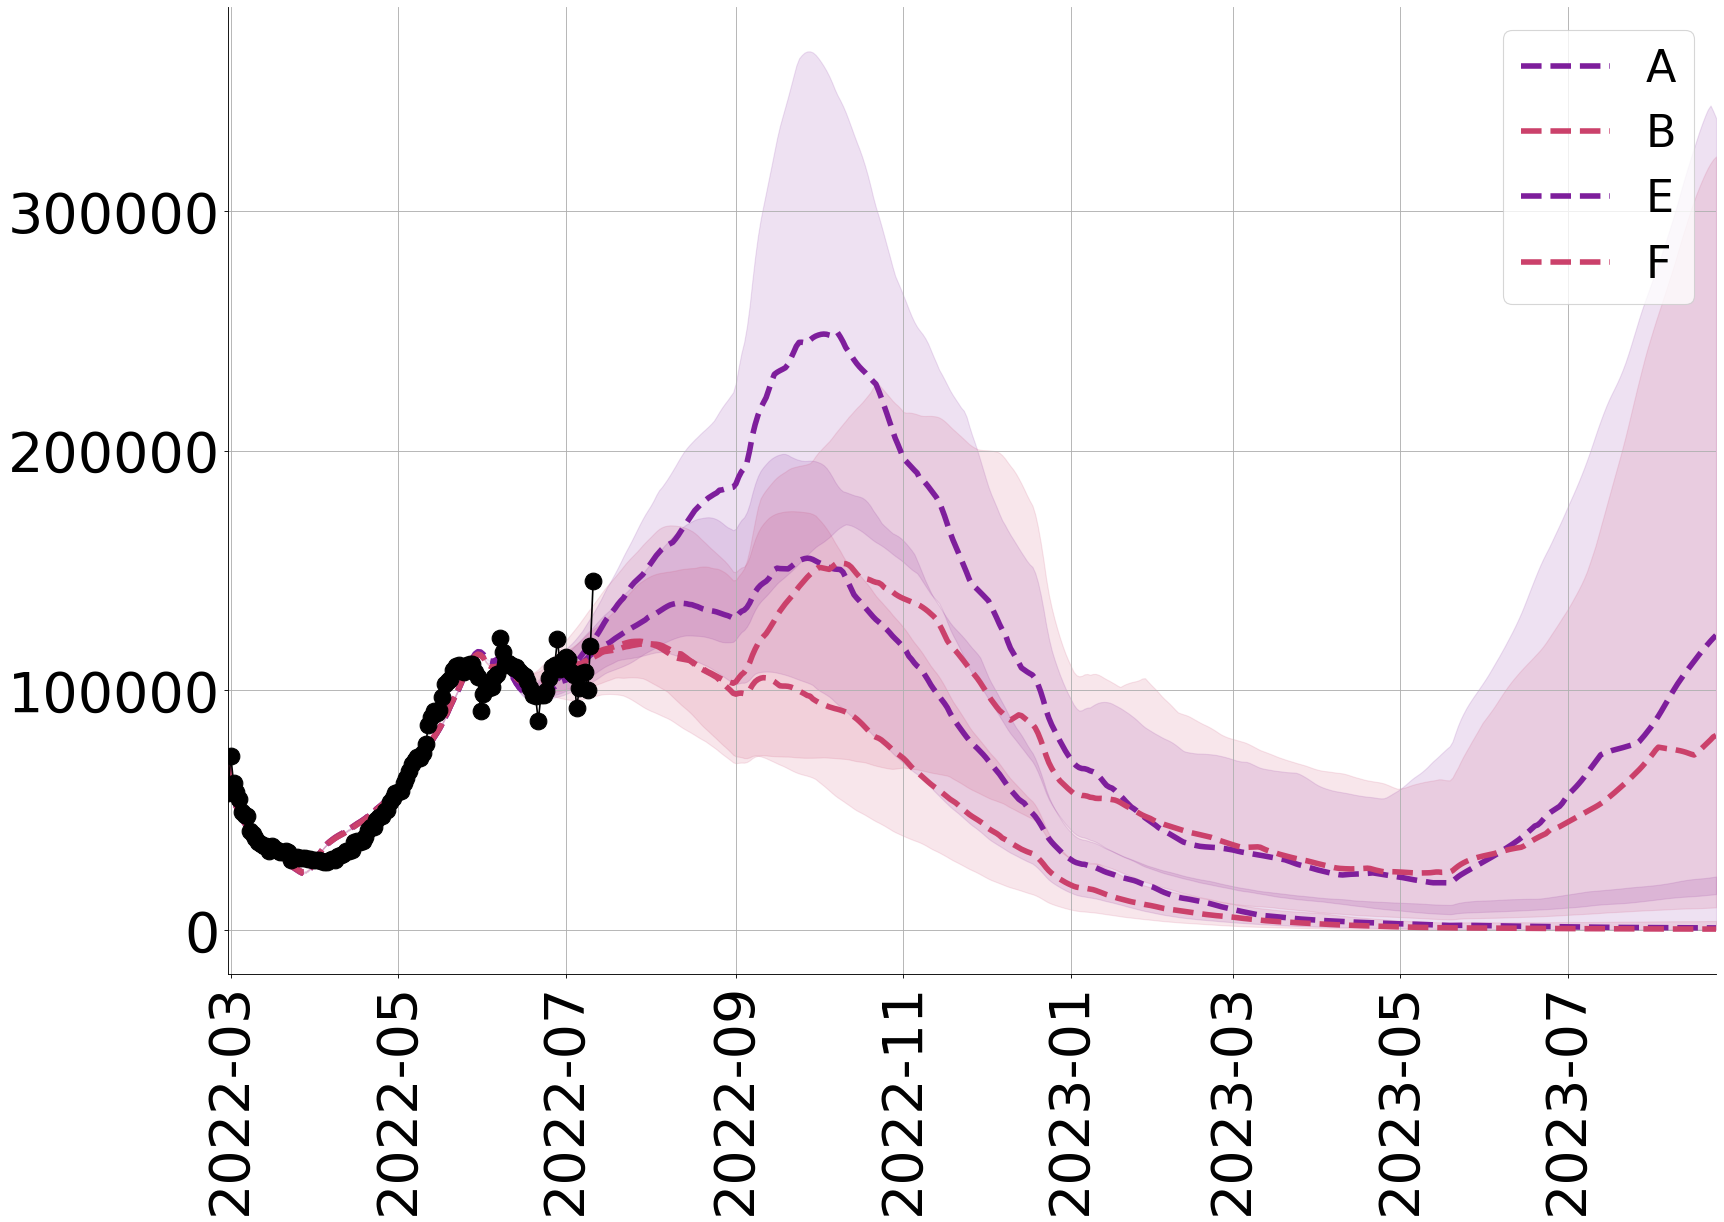

In [60]:
drange1 = pd.date_range("2022-02-28", periods=543, freq="1D") 
drange2 = pd.date_range("2022-02-28", periods=134, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, new_case_p_A[:,2], new_case_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_case_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A')


plt.fill_between(drange1, new_case_p_B[:,2], new_case_p_B[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_case_p_B[:,12], '--', color='xkcd:dark pink', lw=5, label = 'B')



plt.fill_between(drange1, new_case_p_E[:,2], new_case_p_E[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_case_p_E[:,12], '--', color='xkcd:purple', lw=5, label = 'E')


plt.fill_between(drange1, new_case_p_F[:,2], new_case_p_F[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_case_p_F[:,12], '--', color='xkcd:dark pink', lw=5, label = 'F')



plt.plot(drange2, case_avg, 'k-o', markersize=15)

plt.xticks(rotation=90)

plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')


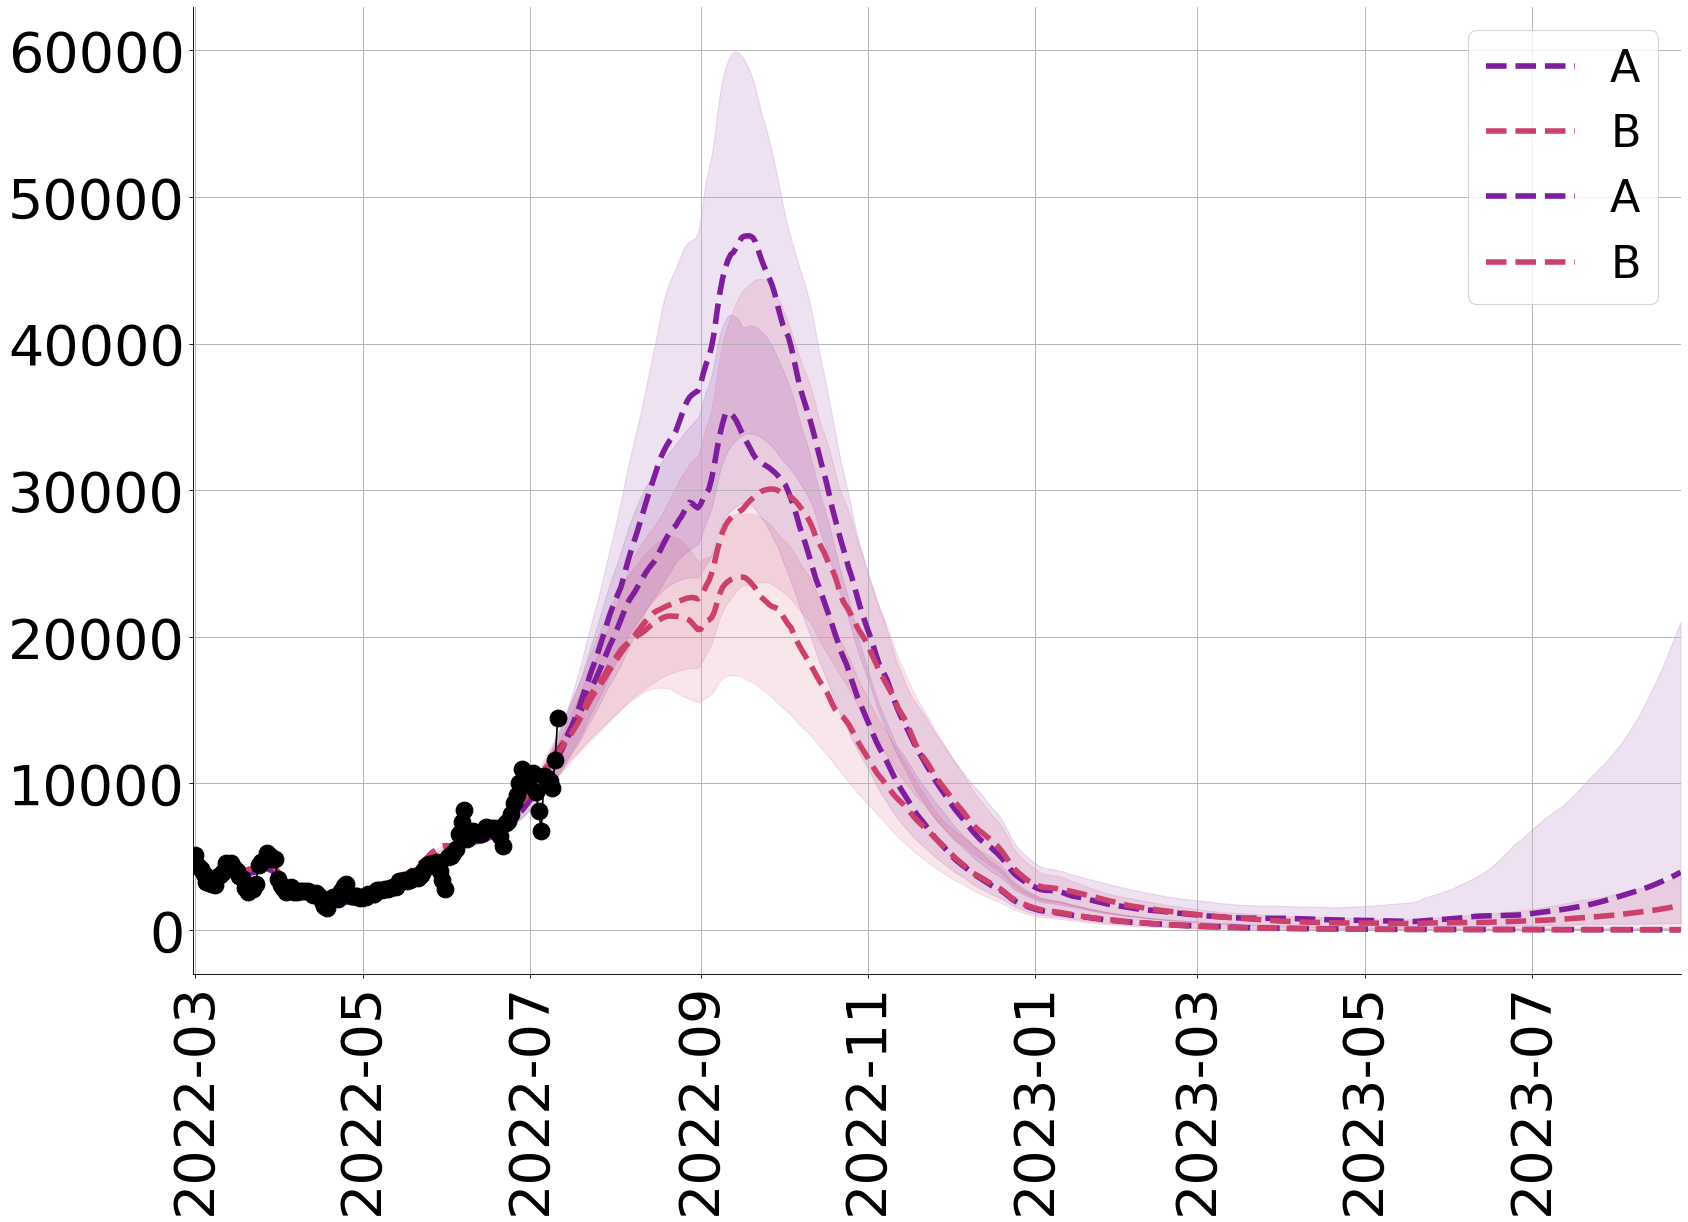

In [106]:
drange1 = pd.date_range("2022-02-28", periods=543, freq="1D") 
drange2 = pd.date_range("2022-02-28", periods=134, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, new_case_p_A[:,2], new_case_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_case_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A')


plt.fill_between(drange1, new_case_p_B[:,2], new_case_p_B[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_case_p_B[:,12], '--', color='xkcd:dark pink', lw=5, label = 'B')



plt.fill_between(drange1, new_case_p_E[:,2], new_case_p_E[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_case_p_E[:,12], '--', color='xkcd:purple', lw=5, label = 'A')


plt.fill_between(drange1, new_case_p_F[:,2], new_case_p_F[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_case_p_F[:,12], '--', color='xkcd:dark pink', lw=5, label = 'B')



plt.plot(drange2, case_avg, 'k-o', markersize=15)

plt.xticks(rotation=90)

plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')


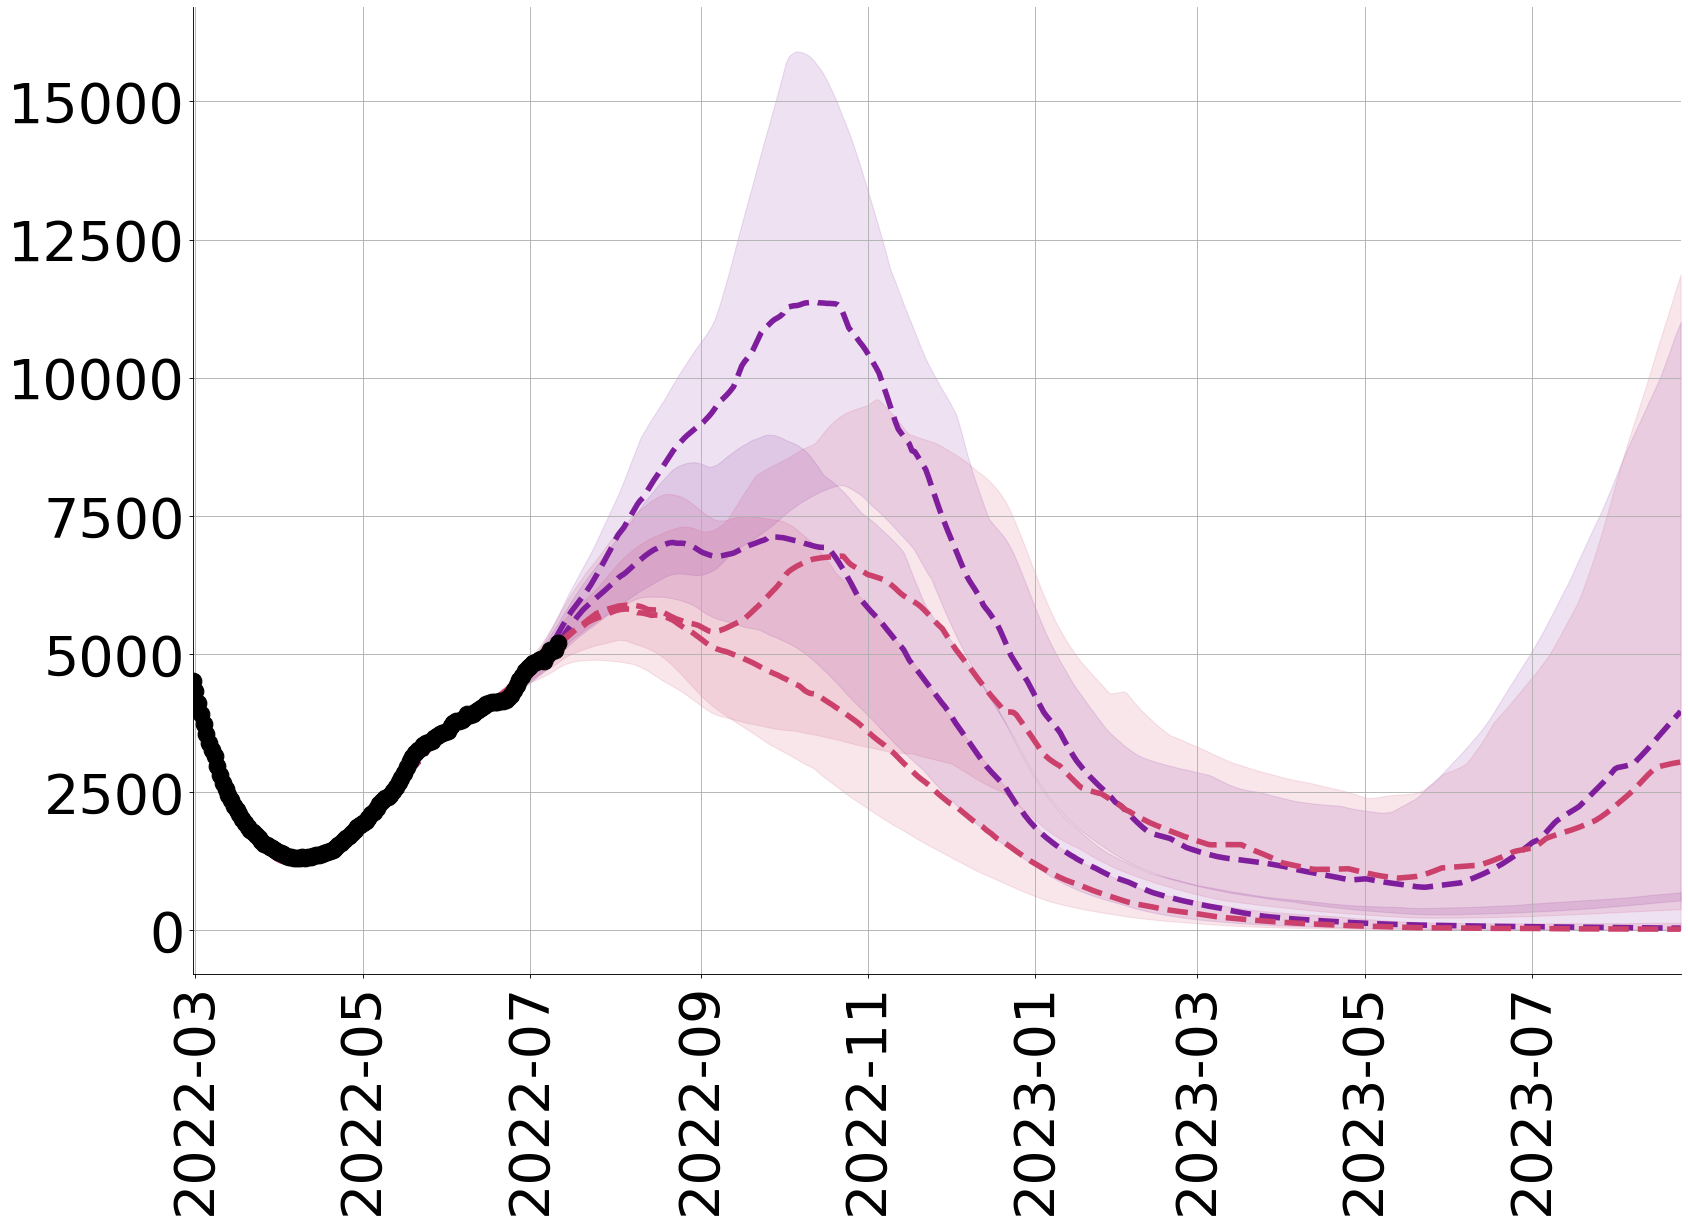

In [67]:
drange1 = pd.date_range("2022-02-28", periods=543, freq="1D") 
drange2 = pd.date_range("2022-02-28", periods=134, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:purple', lw=5, label = '30% more transmissible')


plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:dark pink', lw=5, label = '30% more transmissible')


plt.fill_between(drange1, new_hosp_p_E[:,2], new_hosp_p_E[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_E[:,12], '--', color='xkcd:purple', lw=5, label = 'A')


plt.fill_between(drange1, new_hosp_p_F[:,2], new_hosp_p_F[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_F[:,12], '--', color='xkcd:dark pink', lw=5, label = 'B')

plt.plot(drange2, hosp_avg, 'k-o', markersize=15)

plt.xticks(rotation=90)

#plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')


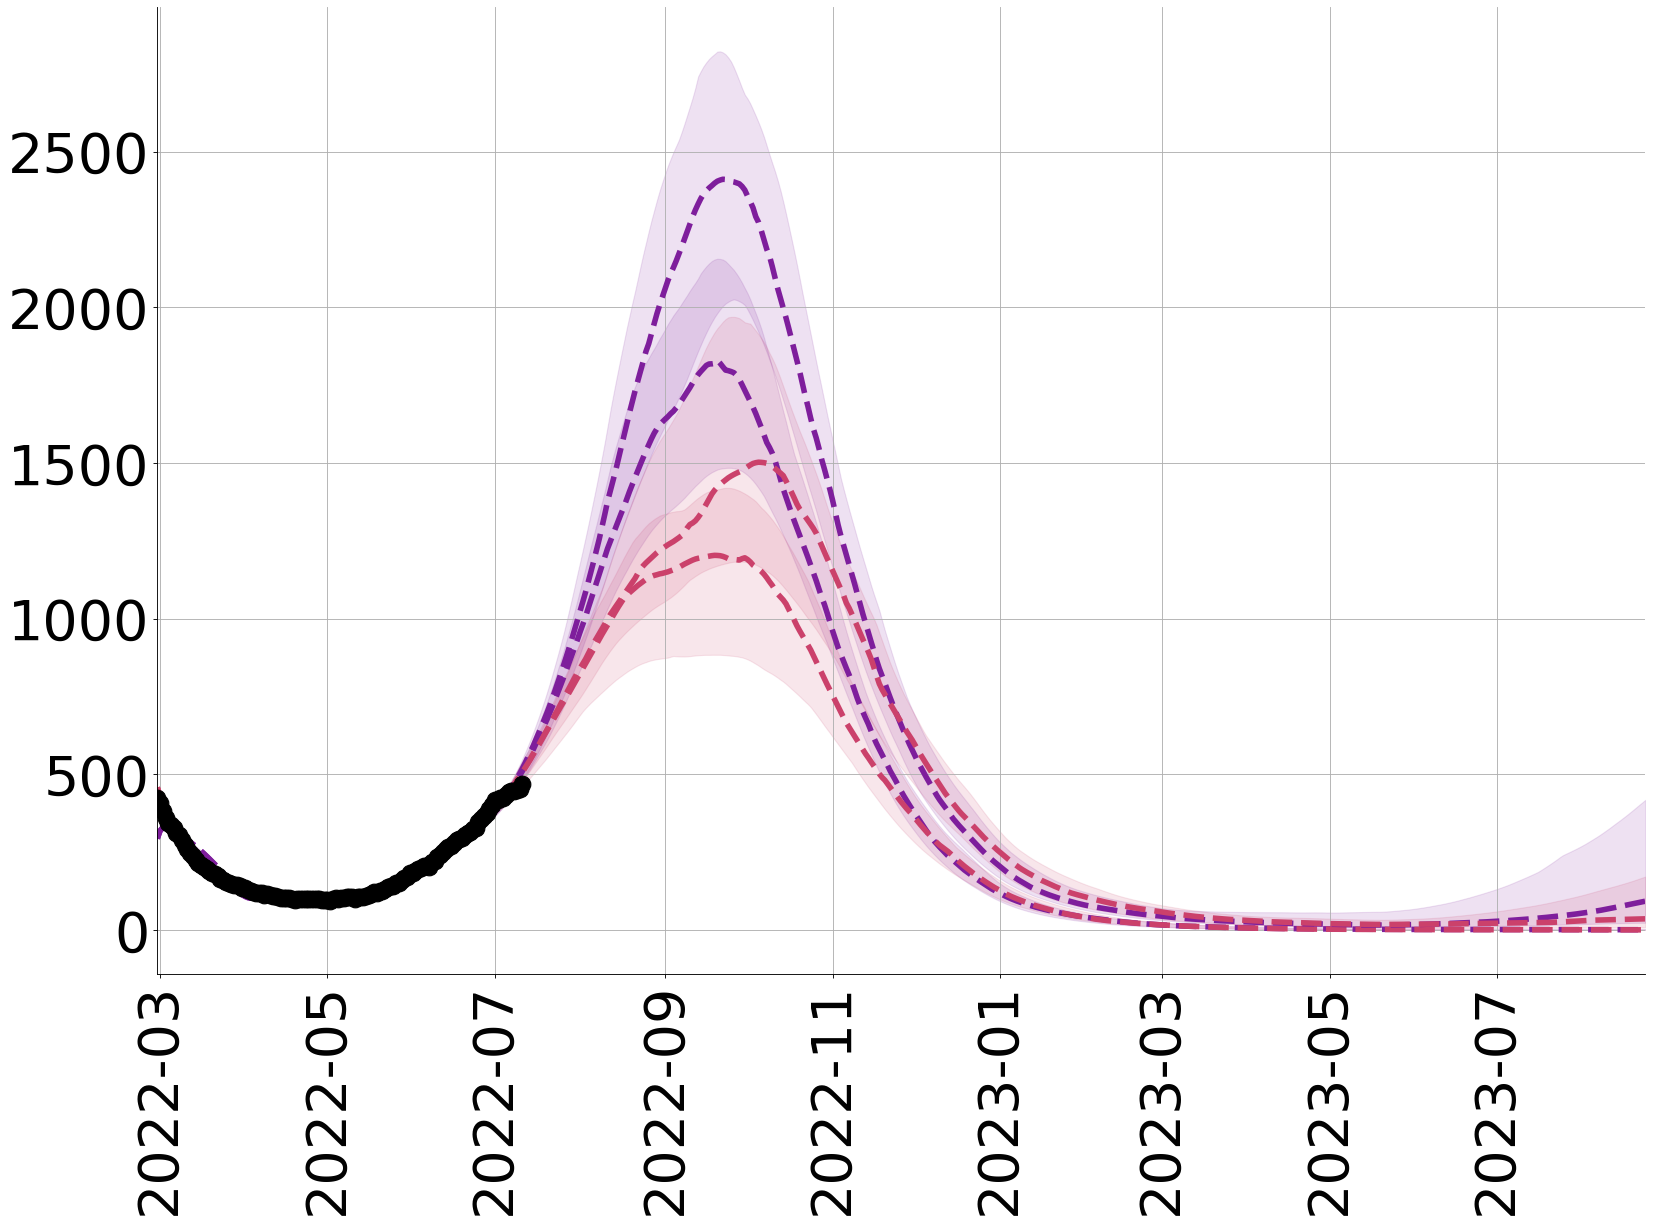

In [98]:
drange1 = pd.date_range("2022-02-28", periods=543, freq="1D") 
drange2 = pd.date_range("2022-02-28", periods=134, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:purple', lw=5, label = '30% more transmissible')


plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:dark pink', lw=5, label = '30% more transmissible')


plt.fill_between(drange1, new_hosp_p_E[:,2], new_hosp_p_E[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_E[:,12], '--', color='xkcd:purple', lw=5, label = 'A')


plt.fill_between(drange1, new_hosp_p_F[:,2], new_hosp_p_F[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_F[:,12], '--', color='xkcd:dark pink', lw=5, label = 'B')


plt.plot(drange2, hosp_avg, 'k-o', markersize=15)

plt.xticks(rotation=90)

#plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')


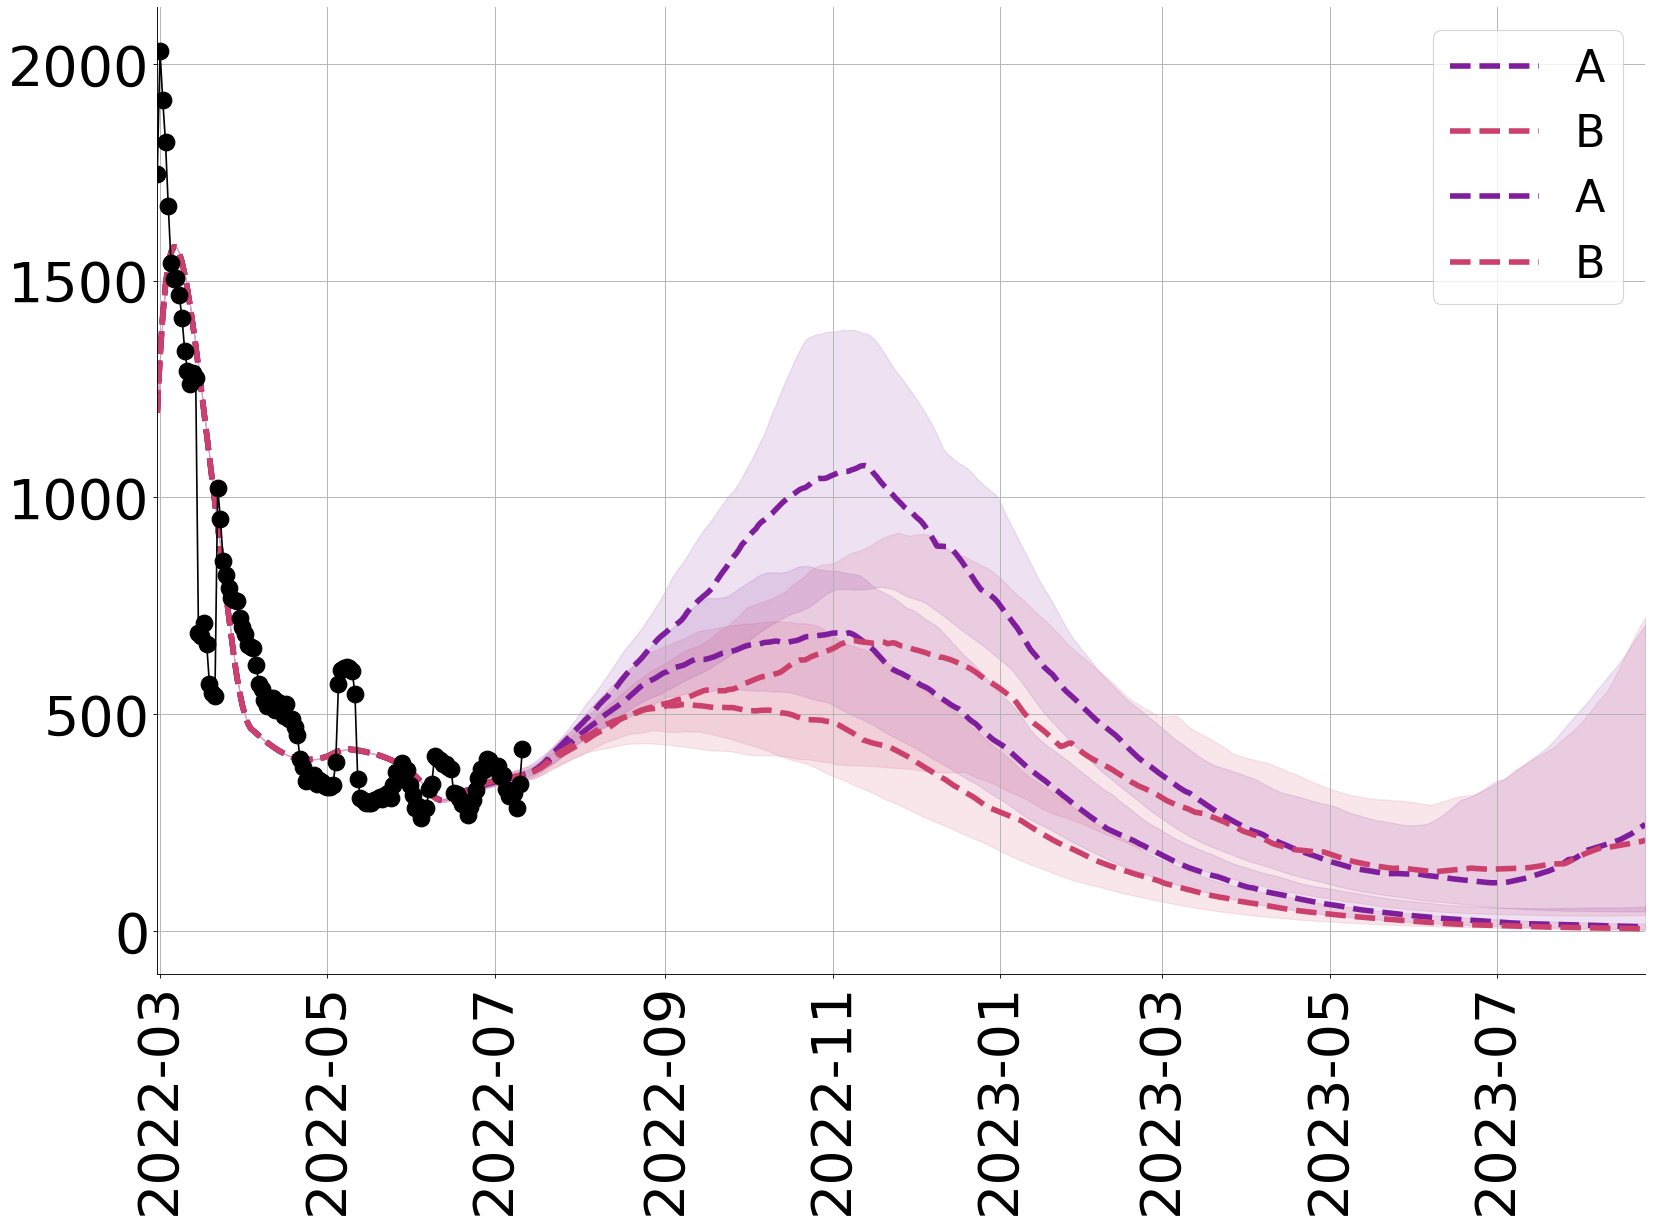

In [66]:
drange1 = pd.date_range("2022-02-28", periods=543, freq="1D") 
drange2 = pd.date_range("2022-02-28", periods=134, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, new_death_p_A[:,2], new_death_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_death_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A')


plt.fill_between(drange1, new_death_p_B[:,2], new_death_p_B[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_death_p_B[:,12], '--', color='xkcd:dark pink', lw=5, label = 'B')


plt.fill_between(drange1, new_death_p_E[:,2], new_death_p_E[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_death_p_E[:,12], '--', color='xkcd:purple', lw=5, label = 'A')


plt.fill_between(drange1, new_death_p_F[:,2], new_death_p_F[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_death_p_F[:,12], '--', color='xkcd:dark pink', lw=5, label = 'B')


plt.plot(drange2, death_avg, 'k-o', markersize=15)

plt.xticks(rotation=90)

plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')


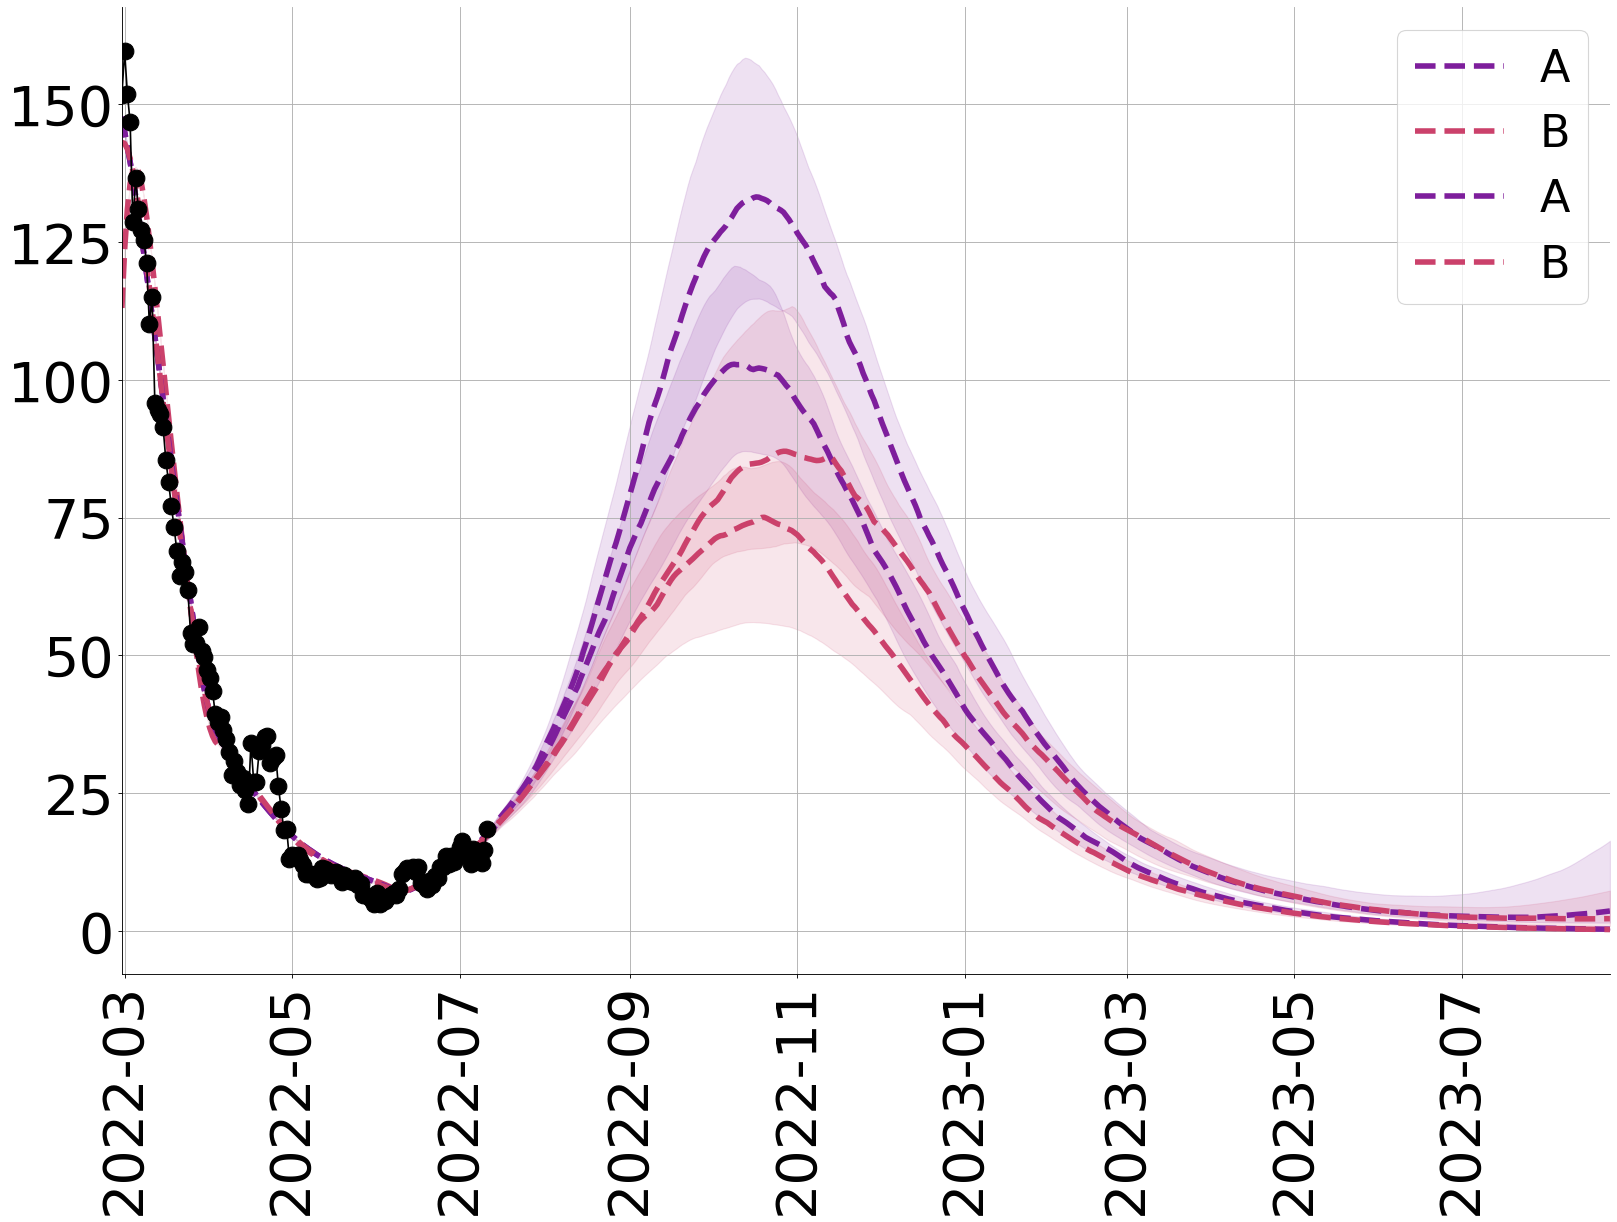

In [99]:
drange1 = pd.date_range("2022-02-28", periods=543, freq="1D") 
drange2 = pd.date_range("2022-02-28", periods=134, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, new_death_p_A[:,2], new_death_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_death_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A')


plt.fill_between(drange1, new_death_p_B[:,2], new_death_p_B[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_death_p_B[:,12], '--', color='xkcd:dark pink', lw=5, label = 'B')



plt.fill_between(drange1, new_death_p_E[:,2], new_death_p_E[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_death_p_E[:,12], '--', color='xkcd:purple', lw=5, label = 'A')


plt.fill_between(drange1, new_death_p_F[:,2], new_death_p_F[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_death_p_F[:,12], '--', color='xkcd:dark pink', lw=5, label = 'B')


plt.plot(drange2, death_avg, 'k-o', markersize=15)

plt.xticks(rotation=90)

plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')


In [2249]:
state

'WV'

In [2250]:
import os
os.makedirs('saved_data/'+state+'', exist_ok=True)

In [2251]:
save_results(state, 'A', new_case_p_A, new_hosp_p_A, new_death_p_A)


In [2252]:
save_results(state, 'B', new_case_p_B, new_hosp_p_B, new_death_p_B)


In [2253]:
save_results(state, 'C', new_case_p_C, new_hosp_p_C, new_death_p_C)

In [2254]:
save_results(state, 'D', new_case_p_D, new_hosp_p_D, new_death_p_D)


drange1 = pd.date_range("2022-02-28", periods=443, freq="1D")
drange2 = pd.date_range("2022-02-28", periods=73, freq="1D")


fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})




plt.fill_between(drange1, new_death_p_A[:,2], new_death_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_death_p_A[:,12], '--', color='xkcd:purple',  lw=5, label = '30% more transmissible')




plt.plot(drange2, death_avg, 'k-o', markersize=15)


plt.xticks(rotation=90)  

#plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True)
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6])
#plt.ylabel('reported deaths')


import matplotlib.dates as mdates

drange1 = pd.date_range("2022-02-28", periods=443, freq="1D")
drange3 = pd.date_range("2022-02-21", periods=532, freq="1D")
drange2 = pd.date_range("2022-02-28", periods=73, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})
#plt.plot(drange, (cases['deaths_avg']), 'r*', label = 'Reported data')
#plt.plot(drange_mon, (cases2['deaths_d_avg']), 'r*', label = 'reported data')
plt_1 = plt.figure(figsize=(20, 16))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  
plt.plot(drange1, I_ov_avg, 'g', label = 'Scenario 2C', lw =4)
plt.plot(drange1, I_ov_avg1, 'b', label = 'Scenario 2C', lw =4)

plt.plot(drange1, I_ov_avg2, 'r', label = 'Scenario 2C', lw =4)

plt.plot(drange2, case_avg, '*', label = 'Scenario B', lw =4)


plt.plot(drange3, vacc_2[2,:])
plt.plot(drange3, vacc_3[2,:])
#plt.plot(drange1, I_ov_avg0, label = 'Baseline (no-Omicron)', lw =4)


plt.ylabel('reported cases', fontsize = 45)

plt.legend(fontsize = 45)

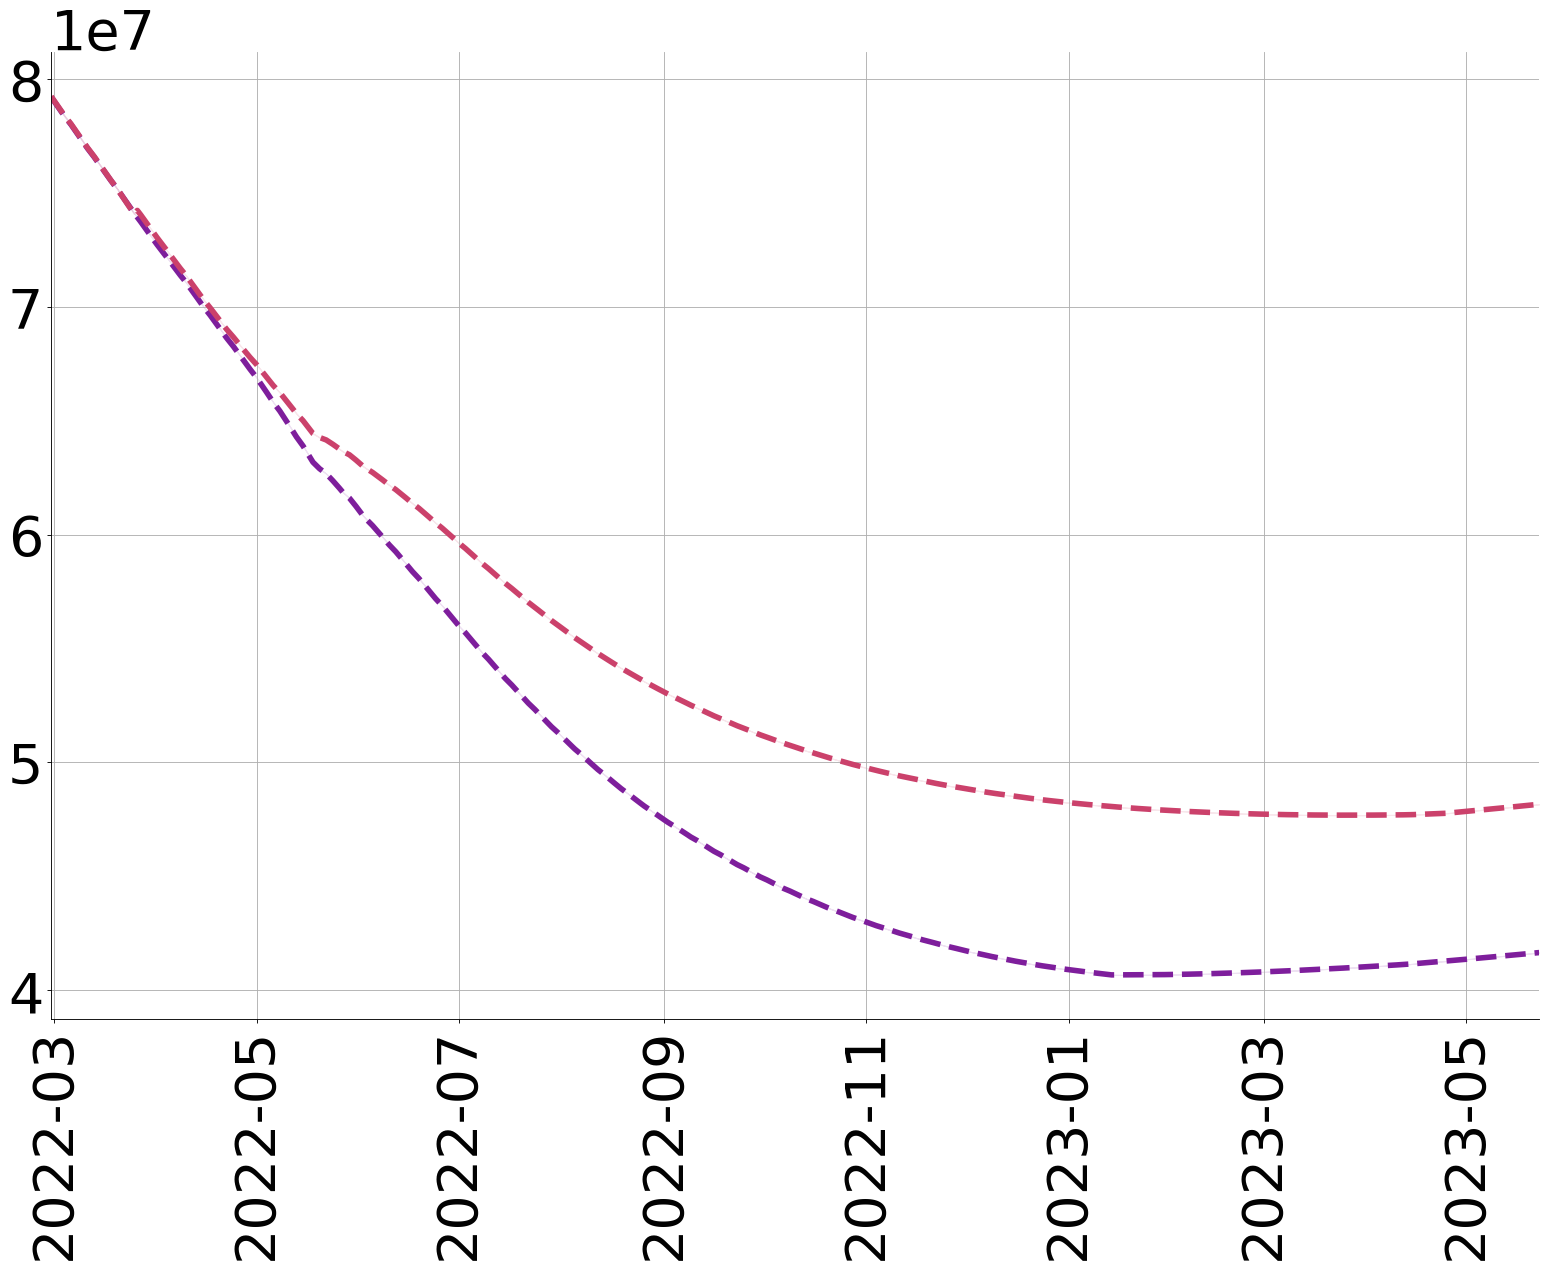

In [86]:
drange1 = pd.date_range("2022-02-28", periods=450, freq="1D") 
drange2 = pd.date_range("2022-02-28", periods=73, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, Srr_p_A[:,2], Srr_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, Srr_p_A[:,12], '--', color='xkcd:purple', lw=5, label = '30% more transmissible')


plt.fill_between(drange1, Srr_p_B[:,2], Srr_p_B[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, Srr_p_B[:,12], '--', color='xkcd:dark pink', lw=5, label = '30% more transmissible')


plt.xticks(rotation=90)

#plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')


In [2]:
drange1 = pd.date_range("2022-02-28", periods=450, freq="1D") 
drange2 = pd.date_range("2022-02-28", periods=73, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, Srr_p_A[:,2], Srr_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, Srr_p_A[:,12], '--', color='xkcd:purple', lw=5, label = '30% more transmissible')


plt.fill_between(drange1, Srr_p_A_1[:,2], Srr_p_A_1[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, Srr_p_A_1[:,12], '--', color='xkcd:dark pink', lw=5, label = '30% more transmissible')

plt.fill_between(drange1, Srr_p_B[:,2], Srr_p_B[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, Srr_p_B[:,12], '--', color='xkcd:purple', lw=5, label = '30% more transmissible')


plt.fill_between(drange1, Srr_p_B_1[:,2], Srr_p_B_1[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, Srr_p_B_1[:,12], '--', color='xkcd:dark pink', lw=5, label = '30% more transmissible')

plt.xticks(rotation=90)

#plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')


NameError: name 'pd' is not defined

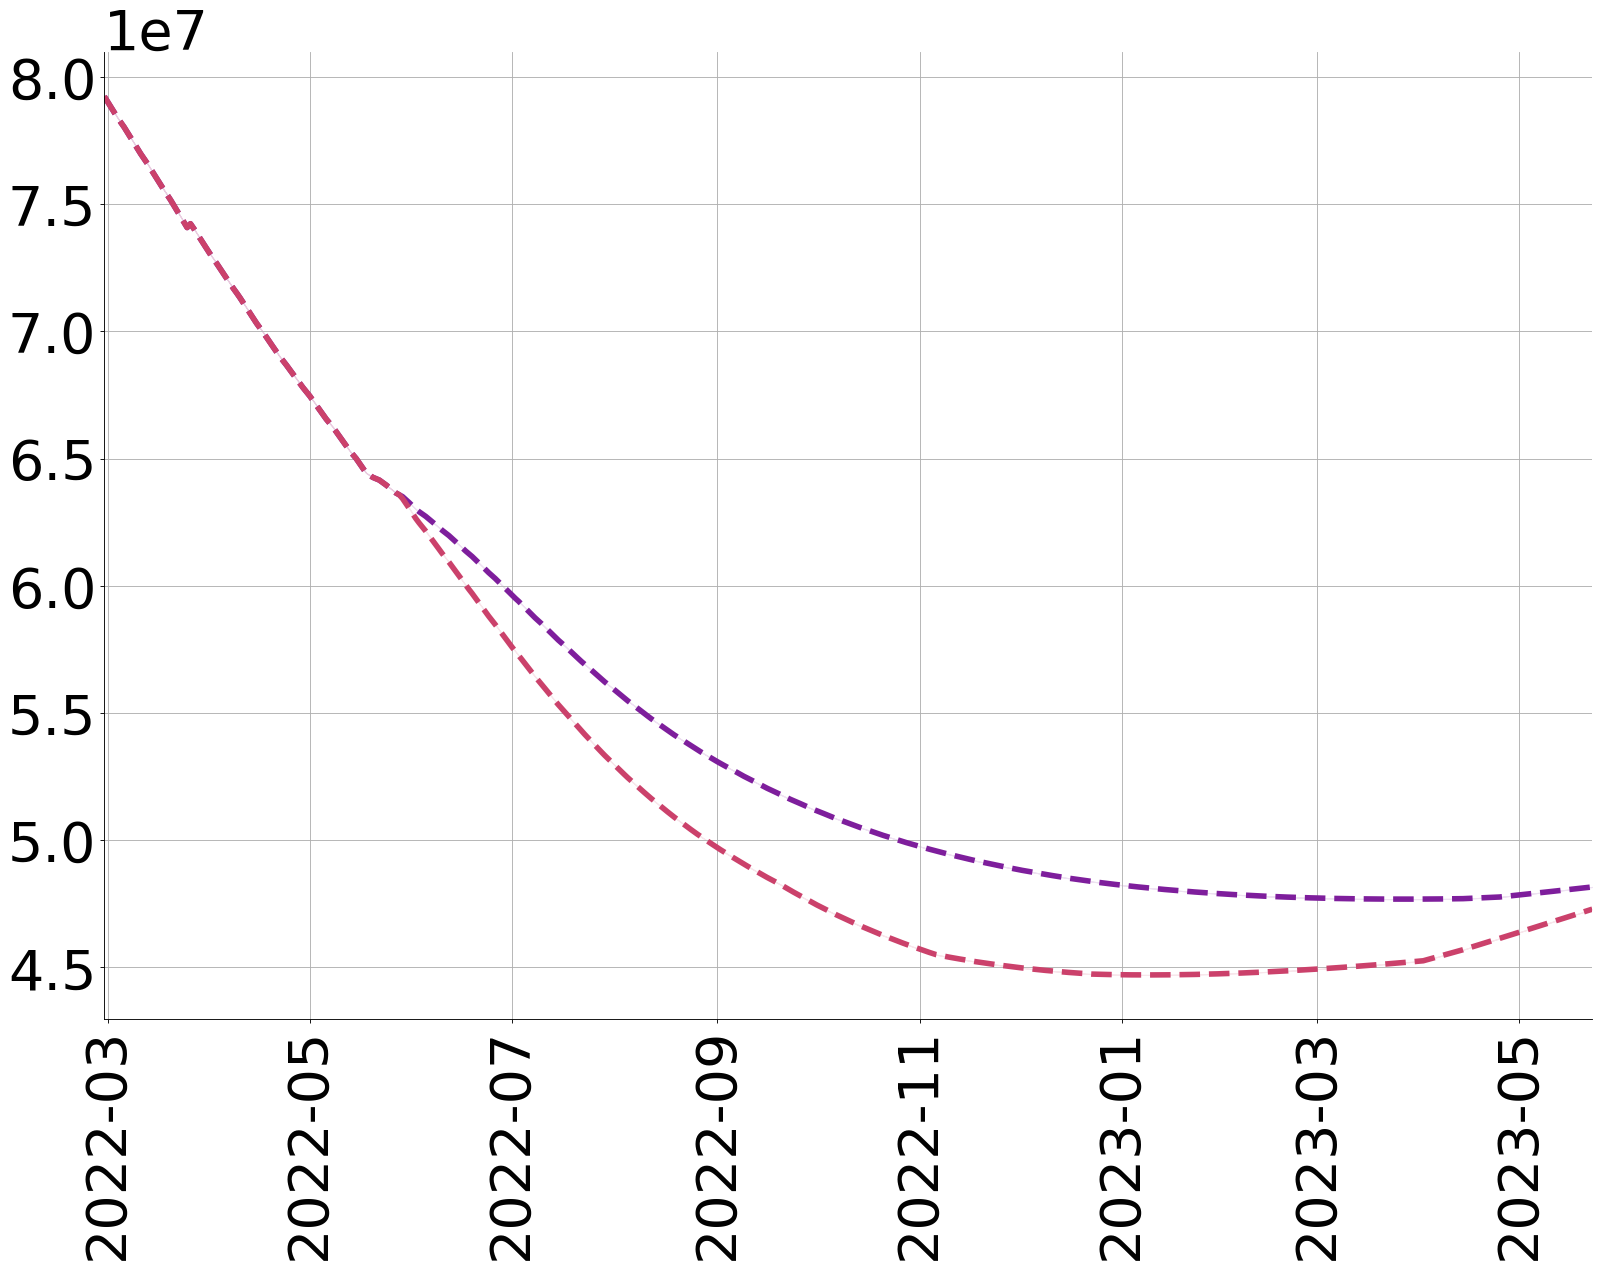

In [88]:
drange1 = pd.date_range("2022-02-28", periods=450, freq="1D") 
drange2 = pd.date_range("2022-02-28", periods=73, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, Srr_p_B[:,2], Srr_p_B[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, Srr_p_B[:,12], '--', color='xkcd:purple', lw=5, label = '30% more transmissible')


plt.fill_between(drange1, Srr_p_B_1[:,2], Srr_p_B_1[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, Srr_p_B_1[:,12], '--', color='xkcd:dark pink', lw=5, label = '30% more transmissible')


plt.xticks(rotation=90)

#plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection') #plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')


In [1]:
Srr_p_B[0, 12]

NameError: name 'Srr_p_B' is not defined

drange1 = pd.date_range("2022-02-28", periods=443, freq="1D")
drange2 = pd.date_range("2022-02-28", periods=73, freq="1D")


fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})




plt.fill_between(drange1, case_test[:,2], case_test[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, case_test[:,12], '--', color='xkcd:purple',  lw=5, label = '30% more transmissible')




plt.plot(drange2, case_avg, 'k-o', markersize=15)


plt.xticks(rotation=90)  

#plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True)
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6])
#plt.ylabel('reported deaths')
